In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
Train_Data = pd.read_csv('Encoded_Train_Data.csv')
Val_Data = pd.read_csv('Encoded_Val_Data.csv') 
Test_Data = pd.read_csv('Encoded_Test_Data.csv') 

In [3]:
Train_Data.columns


Index(['Unnamed: 0', 'Reservation-id', 'Gender', 'Age', 'Educational_Level',
       'Income', 'Expected_checkin', 'Expected_checkout', 'Booking_date',
       'Adults', 'Children', 'Babies', 'Meal_Type', 'Visted_Previously',
       'Previous_Cancellations', 'Deposit_type', 'Required_Car_Parking',
       'Reservation_Status', 'Use_Promotion', 'Discount_Rate', 'Room_Rate',
       'Ethnicity_African American', 'Ethnicity_Asian American',
       'Ethnicity_Latino', 'Ethnicity_caucasian', 'Country_region_East',
       'Country_region_North', 'Country_region_South', 'Country_region_West',
       'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel',
       'Hotel_Type_Resort', 'Booking_channel_Agent', 'Booking_channel_Direct',
       'Booking_channel_Online', 'Days_plan_to_stay', 'checkin_year',
       'checkin_month', 'checkin_day', 'checkin_day_of_the_week',
       'Days_until_checkin', 'Booking_month', 'Booking_day_of_the_week',
       'Min_num_of_rooms', 'Total_Min_Cost', 'Min_Discount_amo

In [4]:
Continus = ['Age','Discount_Rate','Room_Rate','checkin_year','checkin_month','Adults', 'Children', 'Babies',
            'Days_until_checkin','Booking_month','Min_num_of_rooms',
            'Total_Min_Cost','Min_Discount_amount']

Categorical = ['Gender','Educational_Level','Income','Meal_Type', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
              'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 'Booking_channel_Agent', 
              'Booking_channel_Direct','Booking_channel_Online','checkin_day_of_the_week','Booking_day_of_the_week']

Label =['Reservation_Status']

In [5]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Min Value'] = list(Train_Data.min(axis=0))
    summary['Max Value'] = list(Train_Data.max(axis=0))
    return summary

resumetable(Train_Data)

Dataset Shape: (27499, 46)


,Name,dtypes,Missing,Uniques,Min Value,Max Value
0,Unnamed: 0,int64,0,27499,0,27498
1,Reservation-id,int64,0,27495,3154,99999005
2,Gender,int64,0,2,0,1
3,Age,int64,0,53,18,70
4,Educational_Level,int64,0,4,0,3
5,Income,int64,0,4,0,3
6,Expected_checkin,object,0,901,2014-11-18,2017-09-06
7,Expected_checkout,object,0,929,2014-11-22,2017-09-09
8,Booking_date,object,0,1133,2014-01-09,2017-08-30
9,Adults,int64,0,5,1,5


In [43]:
from scipy import stats
z_scores = stats.zscore(Train_Data.loc[:,Categorical+Continus+Label])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_Train_Data = Train_Data.loc[:,Categorical+Continus+Label][filtered_entries]

Y_train = new_Train_Data.loc[:,Label]
Y_val = Val_Data.loc[:,Label]

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(new_Train_Data.loc[:,Categorical+Continus])
transformed_new_Train_Data = pt.transform(new_Train_Data.loc[:,Categorical+Continus])
transformed_Test_Data = pt.transform(Test_Data.loc[:,Categorical+Continus])
transformed_Val_Data = pt.transform(Val_Data.loc[:,Categorical+Continus])

In [45]:
from sklearn.neighbors import KNeighborsClassifier

Continus = ['Age','Discount_Rate','Room_Rate','checkin_month','Adults', 'Children', 'Babies',
            'Days_until_checkin','Booking_month','Min_num_of_rooms','Total_Min_Cost','Min_Discount_amount']

Categorical = ['Gender','Educational_Level','Income','Meal_Type', 'Visted_Previously','Previous_Cancellations', 'Use_Promotion',
              'Ethnicity_African American', 'Ethnicity_Asian American','Ethnicity_Latino', 'Ethnicity_caucasian', 
              'Country_region_East','Country_region_North', 'Country_region_South', 'Country_region_West',
              'Hotel_Type_Airport Hotels', 'Hotel_Type_City Hotel','Hotel_Type_Resort', 'Booking_channel_Agent', 
              'Booking_channel_Direct','Booking_channel_Online','checkin_day_of_the_week','Booking_day_of_the_week']

Label =['Reservation_Status']

Classifier = KNeighborsClassifier(n_neighbors=1, weights='distance')

X_train = transformed_new_Train_Data

Classifier.fit(X_train, Y_train)

c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1, weights='distance')

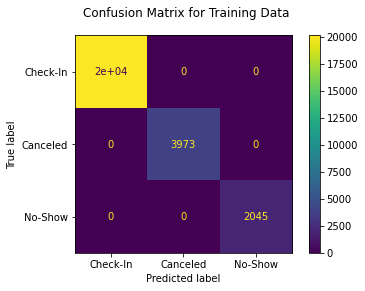

              precision    recall  f1-score   support

    Check-In       1.00      1.00      1.00     20107
    Canceled       1.00      1.00      1.00      3973
     No-Show       1.00      1.00      1.00      2045

    accuracy                           1.00     26125
   macro avg       1.00      1.00      1.00     26125
weighted avg       1.00      1.00      1.00     26125



In [46]:
Y_train_predict = Classifier.predict(transformed_new_Train_Data)
d = {'col1': Y_train_predict}
pred = pd.DataFrame(data=d)

# print(Classifier.score(pred, Y_train))
fig=plot_confusion_matrix(Classifier, transformed_new_Train_Data,Y_train,
display_labels=["Check-In","Canceled","No-Show"])
fig.figure_.suptitle("Confusion Matrix for Training Data")
plt.show()

from sklearn.metrics import classification_report
target_names = ["Check-In","Canceled","No-Show"]
print(classification_report(Y_train, Y_train_predict, target_names=target_names))

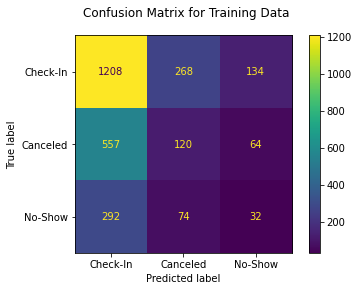

              precision    recall  f1-score   support

    Check-In       0.59      0.75      0.66      1610
    Canceled       0.26      0.16      0.20       741
     No-Show       0.14      0.08      0.10       398

    accuracy                           0.49      2749
   macro avg       0.33      0.33      0.32      2749
weighted avg       0.43      0.49      0.45      2749



In [47]:
X_val = transformed_Val_Data
# Y_val = Val_Data.loc[:,Label]

Y_val_predict = Classifier.predict(X_val)

# print(Classifier.score(Y_val_predict, Y_val))
fig=plot_confusion_matrix(Classifier, X_val,Y_val,display_labels=["Check-In","Canceled","No-Show"])
fig.figure_.suptitle("Confusion Matrix for Training Data")
plt.show()

from sklearn.metrics import classification_report
target_names = ["Check-In","Canceled","No-Show"]
print(classification_report(Y_val, Y_val_predict, target_names=target_names))

In [51]:
X_Test = transformed_Test_Data
# Y_val = Test_Data.loc[:,Label]

Test_Data_predict = Classifier.predict(X_Test)

Test_Data["Reservation_Status"] = Test_Data_predict

# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(3,'No-Show')
# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(2,"Canceled")
# Test_Data["Reservation_Status"]=Test_Data["Reservation_Status"].replace(1,"Check-In")

Submission = Test_Data.loc[:,["Reservation-id","Reservation_Status"]]
Submission.to_csv("Submission Model-6 KNN.csv",index=False)
Submission

,Reservation-id,Reservation_Status
0,62931593,1
1,70586099,1
2,4230648,1
3,25192322,1
4,80931528,1
...,...,...
4313,39110574,1
4314,5496554,1
4315,59004046,1
4316,65838682,1


In [52]:
import lime
import lime.lime_tabular

X_val = Val_Data.loc[:,Categorical+Continus]
Y_val = Val_Data.loc[:,Label]

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_val),
                    feature_names=Categorical+Continus, 
                    class_names=[Label], 
                    # categorical_features=, n
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

explainer

Intercept 1.0
Prediction_local [1.]
Right: 1


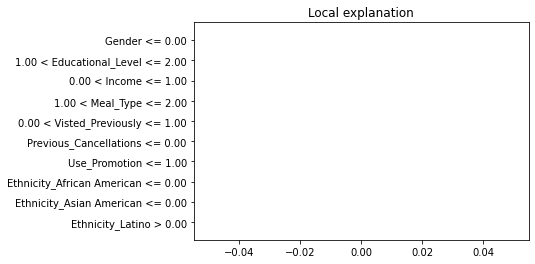

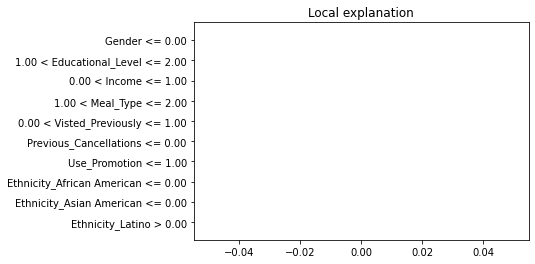

In [53]:
exp = explainer.explain_instance(X_val.iloc[3], Classifier.predict)
exp.as_pyplot_figure()

Intercept 1.0
Prediction_local [1.]
Right: 1


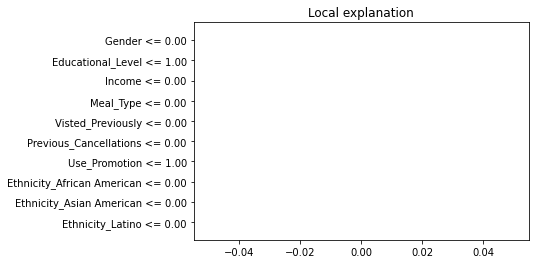

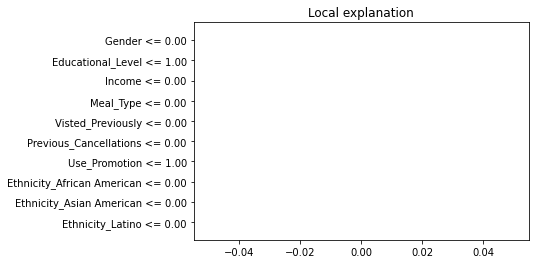

In [54]:
exp = explainer.explain_instance(X_val.iloc[1545], Classifier.predict)
exp.as_pyplot_figure()

In [44]:
X_val

,Gender,Educational_Level,Income,Meal_Type,Visted_Previously,Previous_Cancellations,Use_Promotion,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,...,Room_Rate,checkin_month,Adults,Children,Babies,Days_until_checkin,Booking_month,Min_num_of_rooms,Total_Min_Cost,Min_Discount_amount
0,1,3,0,1,0,0,1,0,0,0,...,192,8,2,2,0,195.0,8,1.0,172.80,19.20
1,1,2,1,2,1,0,0,0,0,1,...,187,8,2,2,0,175.0,8,1.0,187.00,0.00
2,0,2,0,2,0,0,1,0,1,0,...,227,9,3,1,0,193.0,9,1.0,227.00,0.00
3,0,2,1,2,1,0,1,0,0,1,...,189,8,1,2,0,103.0,8,1.0,179.55,9.45
4,0,2,1,1,1,0,1,0,1,0,...,218,8,1,1,0,92.0,8,1.0,196.20,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,0,2,2,0,1,0,1,0,0,0,...,199,11,5,1,1,37.0,11,2.0,298.50,99.50
2745,0,2,1,2,0,0,1,0,0,0,...,106,12,3,2,0,154.0,12,1.0,90.10,15.90
2746,1,3,1,2,0,0,1,0,1,0,...,136,11,2,3,0,30.0,11,1.0,115.60,20.40
2747,1,2,0,1,1,1,1,0,1,0,...,226,11,5,1,0,170.0,11,2.0,452.00,0.00


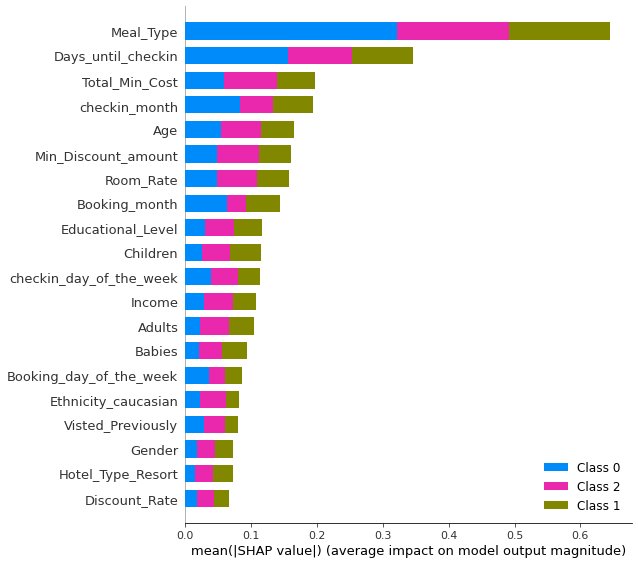

In [37]:
import shap
explainer = shap.TreeExplainer(Classifier)
X_val = Val_Data.loc[:,Categorical+Continus]
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val)